# Data Converting biorobot to ECO format

In [170]:
import os
import glob
from shutil import copyfile, rmtree
import re

import cv2
import matplotlib.pyplot as plt

In [171]:
def check_img_label_pair(img_path, label_path):
    img = cv2.imread(img_path)
    with open(label_path, 'r') as rf:
        labels = rf.read().split('\n')
    
    img_idx = int(img_path.split('/')[-1].split('.')[0]) - 1
    label = labels[img_idx]

    coords = [int(i) for i in label.split('\t')]
    x1, y1, w, h = coords

    plt.imshow(img)
    plt.show()

    cv2.rectangle(img, (x1, y1), (x1+w, y1+h), 255, 2)

    plt.imshow(img)
    plt.show()

In [175]:
def convert_mpbiorobot_to_eco(data_dir):
    if 'catheter' in data_dir:
        data_type = 'catheter'
    elif 'guidewire' in data_dir:
        data_type = 'guidewire'
    else:
        raise ValueError('data directory has problem')
    file_list = sorted(glob.glob(data_dir + '/*.jpg'), key=lambda x: int(re.findall('(?<=_)[0-9]+(?=.jpg)', x)[0]))
    
    label_path = os.path.join(data_dir, f'{data_type}_coords')

    with open(label_path, 'r') as f:
        lines = f.read().split()
    
    lines = sorted(lines, key=lambda x: int(re.findall('(?<=_)[0-9]+(?=.jpg)', x)[0]))
    
    labels = []
    for l in lines:
        coords = [float(i) for i in l.split(',')[1:]]
        cx, cy, w, h = coords
        x1, y1 = cx - w//2, cy - h//2
        coords = int(x1), int(y1), int(w), int(h)

        labels.append(coords)
    
    save_dir = f'./sequences/{data_type}'
    rmtree(save_dir)
    save_img_dir = f'./sequences/{data_type}/img'
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs(save_img_dir, exist_ok=True)

    label_save_path = os.path.join(save_dir, 'groundtruth_rect.txt')

    with open(label_save_path, 'w') as wf:
        for i, (img_path, label) in enumerate(zip(file_list, labels)):
            img_save_path = os.path.join(save_img_dir, f'{i+1:04d}.jpg')
            copyfile(img_path, img_save_path)
            wf.write('\t'.join([str(i) for i in label]) + '\n')
    return save_dir

In [176]:
catheter_data_dir = '/home/whikwon/Documents/github/mp_biorobot_monitoring/video/CBN_PCIM_02/catheter_resized/Balloon_RCA_06'

In [177]:
catheter_save_dir = convert_mpbiorobot_to_eco(catheter_data_dir)

In [178]:
test_img_path = os.path.join(catheter_save_dir, 'img', '0033.jpg')
test_label_path = os.path.join(catheter_save_dir, 'groundtruth_rect.txt')

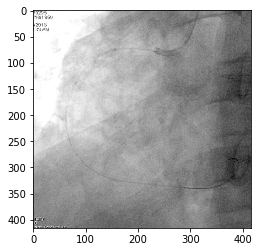

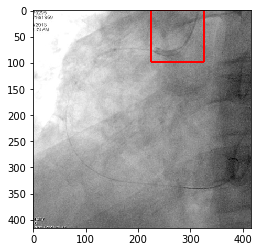

In [179]:
check_img_label_pair(test_img_path, test_label_path)

# Guidewire Test

In [148]:
guidewire_data_dir = '/home/whikwon/Documents/github/mp_biorobot_monitoring/video/CBN_PCIM_05/guidewire_resized/Guidewire_Right_01/'

In [149]:
guidewire_save_dir = convert_mpbiorobot_to_eco(guidewire_data_dir)

In [150]:
test_img_path = os.path.join(guidewire_save_dir, 'img', '0001.jpg')
test_label_path = os.path.join(guidewire_save_dir, 'groundtruth_rect.txt')

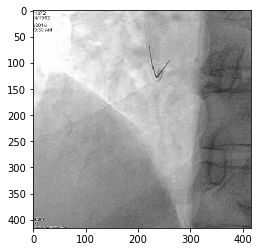

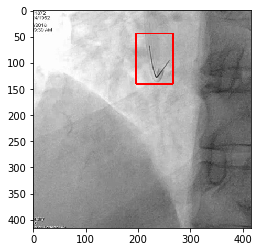

In [151]:
check_img_label_pair(test_img_path, test_label_path)

# Test given sample image label pair

In [38]:
sample_data_dir = './sequences/Crossing/'

sample_img_path = os.path.join(sample_data_dir, 'img', '0001.jpg')
sample_label_path = os.path.join(sample_data_dir, 'groundtruth_rect.txt')

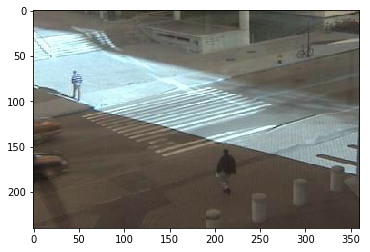

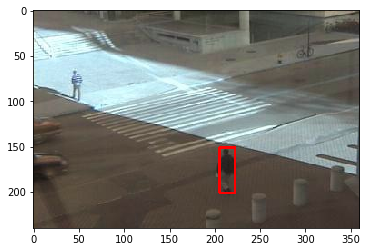

In [211]:
check_img_label_pair(sample_img_path, sample_label_path)